# Explorar, cargar y descargar datos satelitales


Por supuesto, con SPAI se puede explorar y descargar distintas colecciones y tipos de datos satelitales. Vamos a ver cómo explorar, cargar y descargar estos datos.


Lo primero que podemos anter, antes de nada, es ver las colecciones de datos disponibles ahora mismo.

> ¡Estad atentos! Actualizamos nuestras colecciones de datos constantemente.


In [6]:
from spai.data.satellite import AVAILABLE_COLLECTIONS

AVAILABLE_COLLECTIONS

['sentinel-2-l2a',
 'sentinel-1-grd',
 'sentinel-1-rtc',
 'cop-dem-glo-30',
 'cop-dem-glo-90',
 'esa-worldcover',
 'landsat-8-c2-l2',
 'modis-burned-areas',
 'modis-snow-cover-8',
 'modis-snow-cover-daily',
 'alos-palsar-mosaic']

## Explorar imágenes disponibles


Ahora podemos explorar las imágenes disponibles en una zona. Lo que necesitamos para buscar, es lo siguiente:

- `aoi`: puede ser **_cualquier cosa relacionada con una geometría o un lugar_**, como el nombre de un lugar, una bounding box, una geometría o un GeoDataFrame.
- `date`: str, lista o objetos de fecha y hora. Puede ser una fecha única, como 2020-01-01, o un intervalo de tiempo, como (2020-01-01, 2020-01-10) o 2020-01-01/2020-01-10. Si no se proporciona, busca las imágenes disponibles en el último mes.
- `colection`: str. Una de las AVAILABLE_COLLECTIONS. Si no se proporciona, de forma predeterminada es `sentinel-2-l2a`.


In [7]:
from spai.data.satellite import explore_satellite_imagery

search = explore_satellite_imagery("Madrid")
print(len(search))
search[:3]

24


[{'id': 'S2B_30TVL_20240510_0_L2A',
  'datetime': '2024-05-10T11:19:49Z',
  'thumbnail': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/30/T/VL/2024/5/S2B_30TVL_20240510_0_L2A/thumbnail.jpg'},
 {'id': 'S2B_30TVK_20240510_0_L2A',
  'datetime': '2024-05-10T11:20:03Z',
  'thumbnail': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/30/T/VK/2024/5/S2B_30TVK_20240510_0_L2A/thumbnail.jpg'},
 {'id': 'S2A_30TVL_20240512_0_L2A',
  'datetime': '2024-05-12T11:09:55Z',
  'thumbnail': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/30/T/VL/2024/5/S2A_30TVL_20240512_0_L2A/thumbnail.jpg'}]

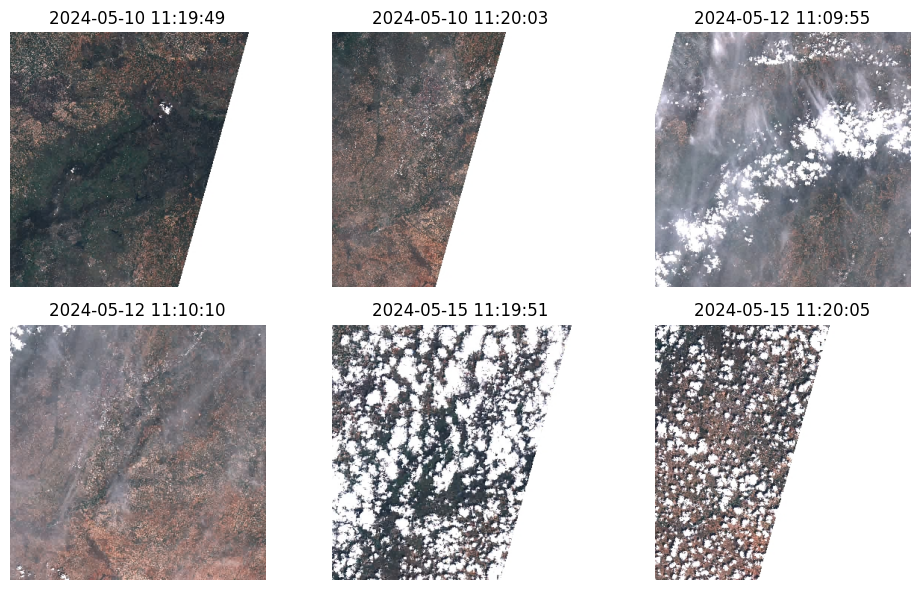

In [8]:
import datetime
from PIL import Image
from io import BytesIO
import requests

import matplotlib.pyplot as plt


def plot_thumbnail(search, number):
    fig, axes = plt.subplots(2, 3, figsize=(10, 6))

    for i, image in enumerate(search[:number]):
        response = requests.get(image["thumbnail"])
        img = Image.open(BytesIO(response.content))

        # Get the datetime from the image
        datetime_str = image["datetime"]
        datetime_obj = datetime.datetime.strptime(datetime_str, "%Y-%m-%dT%H:%M:%SZ")

        # Plot the image with datetime as title
        ax = axes[i // 3, i % 3]
        ax.imshow(img)
        ax.set_title(datetime_obj)
        ax.axis("off")

    plt.tight_layout()
    plt.show()


plot_thumbnail(search, 6)

Como se ha dicho, también se puede probar con un GeoDataFrame de GeoPandas.


In [9]:
import geopandas as gpd
import leafmap

gdf = gpd.read_file("workshop_data/boadella.geojson")
m = leafmap.Map()
m.zoom_control = True
m.add_gdf(gdf)
m.zoom_to_bounds(gdf.total_bounds)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [10]:
search = explore_satellite_imagery(gdf, date="2020-01-01/2020-01-15")
search[:3]

[{'id': 'S2B_31TDH_20200103_1_L2A',
  'datetime': '2020-01-03T10:49:07Z',
  'thumbnail': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/T/DH/2020/1/S2B_31TDH_20200103_1_L2A/thumbnail.jp2'},
 {'id': 'S2B_31TDH_20200103_0_L2A',
  'datetime': '2020-01-03T10:49:07Z',
  'thumbnail': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/T/DH/2020/1/S2B_31TDH_20200103_0_L2A/thumbnail.jpg'},
 {'id': 'S2B_31TDG_20200103_1_L2A',
  'datetime': '2020-01-03T10:49:21Z',
  'thumbnail': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/T/DG/2020/1/S2B_31TDG_20200103_1_L2A/thumbnail.jpg'}]

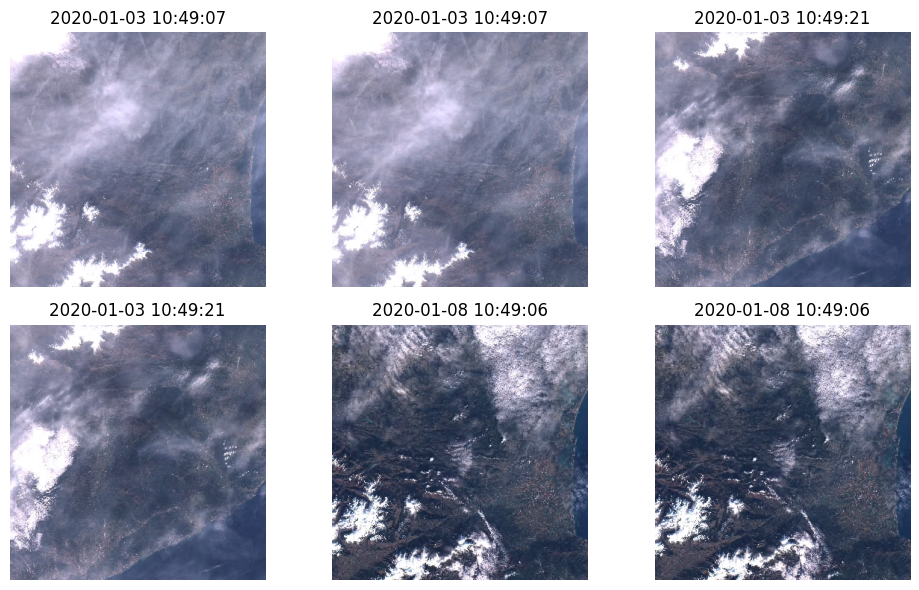

In [11]:
plot_thumbnail(search, 6)

Como se puede ver, las imágenes tiene un alto porcentaje de cobertura de nubes. Por supuesto, podemos añadir parámetros extra a nuestra búsqueda, como por ejemplo `cloud_cover`, `vegeration_percentage`, etc. Además de otros parámetros de pre-procesado de los datos, como su `CRS`, resolución o bandas.


- `crs`: el `CRS` de los datos a recuperar.
- `resolution`: la resolución de los datos a recuperar. Debe estar en las unidades crs. ex. EPSG4326 está en grados, EPSG3857 en metros.
- `bands`: bandas para recuperar. De forma predeterminada, cada colección tiene bandas predeterminadas. p.ej. Sentinel-2-l2a tiene del 1 al 12 (costero, azul, verde...), o Sentinel-1-grd tiene vv y vh.
- Otros parámetros extra.

Para ver la lista de parámetros, bandas por defecto y demás información de las colecciones, podeis ir a la [referencia](https://spai.earthpulse.ai/docs/reference/lib/data-collections).


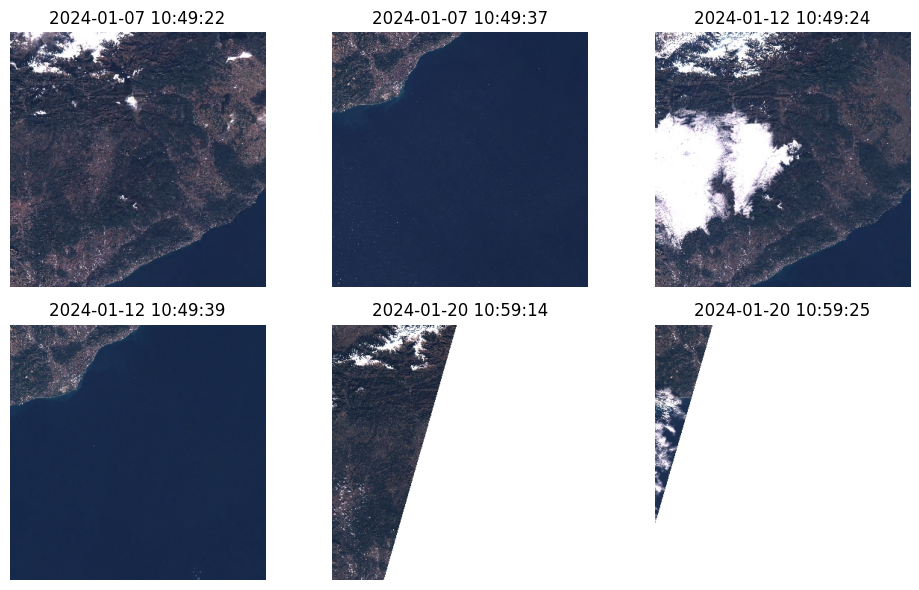

In [12]:
cloud_cover = 50
search = explore_satellite_imagery(
    "Barcelona", ("2024-01-01", "2024-02-01"), "sentinel-2-l2a", cloud_cover=cloud_cover
)
plot_thumbnail(search, 6)

## Cargar imágenes en memoria


Los datos satelitales pueden llegar a ser muy grandes y consumir mucho en términos de espacio y recursos de computación. Con SPAI se pueden explorar y cargar los datos que necesitemos directamente en memoria, utilizando la librería `xarray`, y cargando los datos directamente como un `xr.Dataset`. Esto nos permite un manejo más eficiente de los datos.

https://earth-env-data-science.github.io/lectures/xarray/xarray.html


In [13]:
from spai.data.satellite import load_satellite_imagery
import geopandas as gpd

gdf = gpd.read_file("workshop_data/boadella.geojson")
bands = ["red", "green", "blue"]
data = load_satellite_imagery(
    gdf, date="2023-08-01/2023-08-30", bands=bands, cloud_cover=40
)
data

<xarray.Dataset> Size: 8MB
Dimensions:      (latitude: 578, longitude: 607, time: 4)
Coordinates:
  * latitude     (latitude) float64 5kB 42.37 42.37 42.37 ... 42.32 42.32 42.32
  * longitude    (longitude) float64 5kB 2.783 2.783 2.784 ... 2.838 2.838 2.838
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 32B 2023-08-05T10:49:17.215000 ... 202...
Data variables:
    red          (time, latitude, longitude) uint16 3MB dask.array<chunksize=(4, 512, 512), meta=np.ndarray>
    green        (time, latitude, longitude) uint16 3MB dask.array<chunksize=(4, 512, 512), meta=np.ndarray>
    blue         (time, latitude, longitude) uint16 3MB dask.array<chunksize=(4, 512, 512), meta=np.ndarray>

In [14]:
data["red"]

<xarray.DataArray 'red' (time: 4, latitude: 578, longitude: 607)> Size: 3MB
dask.array<red, shape=(4, 578, 607), dtype=uint16, chunksize=(4, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * latitude     (latitude) float64 5kB 42.37 42.37 42.37 ... 42.32 42.32 42.32
  * longitude    (longitude) float64 5kB 2.783 2.783 2.784 ... 2.838 2.838 2.838
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 32B 2023-08-05T10:49:17.215000 ... 202...
Attributes:
    nodata:   0

PLOTEAR IMAGEN AQUI


In [15]:
from spai.data.satellite import load_satellite_imagery
import geopandas as gpd

# Example with no query and crs
data = load_satellite_imagery(
    gdf,
    ("2020-01-01", "2020-01-10"),
    "sentinel-1-grd",
)
data

<xarray.Dataset> Size: 45MB
Dimensions:      (latitude: 1155, longitude: 1212, time: 4)
Coordinates:
  * latitude     (latitude) float64 9kB 42.37 42.37 42.37 ... 42.32 42.32 42.32
  * longitude    (longitude) float64 10kB 2.783 2.783 2.783 ... 2.838 2.838
    spatial_ref  int32 4B 4326
  * time         (time) datetime64[ns] 32B 2020-01-04T05:52:19.536133 ... 202...
Data variables:
    vv           (time, latitude, longitude) float32 22MB dask.array<chunksize=(4, 512, 512), meta=np.ndarray>
    vh           (time, latitude, longitude) float32 22MB dask.array<chunksize=(4, 512, 512), meta=np.ndarray>

PLOTEAR IMAGEN AQUI


## Descargar imágenes en un Storage de SPAI


Por último, los datos pueden descargarse a un `Storage` de SPAI. Los parámetros son:

- `storage`: el almacenamiento donde se descargará la información.
- `name`: el nombre de la imagen o imágenes. Si es una sola imagen, es el nombre completo de la imagen. Por defecto es `collection_date`.
- `clip`: si el usuario desea recortar los datos a una geometría.
- Otros parámetros ya vistos como `aoi`, `datetime`, `resolution`, `query`, etc.


We can use the search we done before to download the images for every date.


In [16]:
from spai.data.satellite import download_satellite_imagery
from spai.storage import Storage
import os

os.environ["SPAI_STORAGE_NAMES"] = "local_data"
os.environ["SPAI_STORAGE_LOCAL_PATH"] = "./data"

storage = Storage()["data"]

# This will download to the storage several images with the name given
# We can control the full name of the imagegdf = gpd.read_file("map.geojson")
for date in ("2020-01-03", "2020-01-08"):
    download_satellite_imagery(storage, gdf, date=date, name=f"image_{date}.tif")

'data' created


We can pass a single date to download.


In [18]:
# This will download a single image for the date, if exists
date = "2020-01-03"
download_satellite_imagery(storage, gdf, date)

'data/sentinel-2-l2a_2020-01-03.tif'

PLOTEAR AQUI IMAGENES CON LEAFMAP
